In the following example, we will perform multiple linear regression for a fictitious economy, where the index_price is the dependent variable, and the 2 independent/input variables are:

    interest_rate
    unemployment_rate

Please note that you will have to validate that several assumptions are met before you apply linear regression models. Most notably, you have to make sure that a linear relationship exists between the dependent variable and the independent variable/s (more on that under the checking for linearity section).

Let’s now jump into the dataset that we’ll be using. The data will be captured using Pandas DataFrame:

In [1]:
import pandas as pd

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

### Checking for Linearity

Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

In our example, you may want to check that a linear relationship exists between the:

    index_price (dependent variable) and interest_rate (independent variable)
    index_price (dependent variable) and unemployment_rate (independent variable)

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library). For example, you can use the code below in order to plot the relationship between the index_price and the interest_rate:

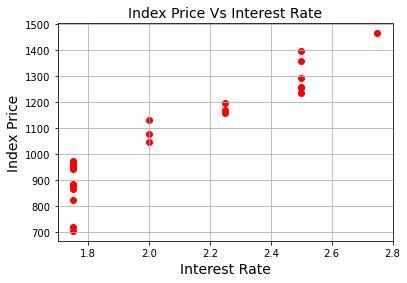

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

You’ll notice that indeed a linear relationship exists between the index_price and the interest_rate. Specifically, when interest rates go up, the index price also goes up.

And for the second case, you can use this code in order to plot the relationship between the index_price and the unemployment_rate:

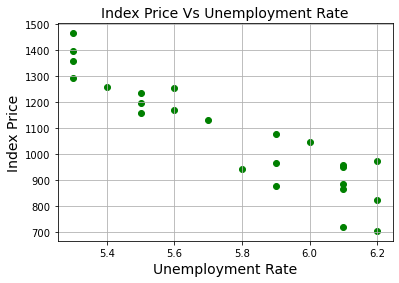

In [5]:
plt.scatter(df['unemployment_rate'], df['index_price'], color='green')
plt.title('Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

You’ll notice that a linear relationship also exists between the index_price and the unemployment_rate – when the unemployment rates go up, the index price goes down (here we still have a linear relationship, but with a negative slope).

Next, we are going to perform the actual multiple linear regression in Python.

### Performing the Multiple Linear Regression

Once you added the data into Python, you may use either sklearn or statsmodels to get the regression results.

Either method would work, but let’s review both methods for illustration purposes.

### sklearn

In [7]:
from sklearn import linear_model

x = df[['interest_rate','unemployment_rate']]
y = df['index_price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


This output includes the intercept and coefficients. You can use this information to build the multiple linear regression equation as follows:

index_price = (intercept) + (interest_rate coef)*X1 + (unemployment_rate coef)*X2

And once you plug the numbers:

index_price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2

### statsmodels

In [8]:
import statsmodels.api as sm

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.04e-11
Time:                        17:55:27   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

Notice that the coefficients captured in this table match with the coefficients generated by sklearn.

That’s a good sign! we got consistent results by applying both sklearn and statsmodels.

### Conclusion

Linear regression is often used in Machine Learning. You have seen some examples of how to perform multiple linear regression in Python using both sklearn and statsmodels.

Before applying linear regression models, make sure to check that a linear relationship exists between the dependent variable (i.e., what you are trying to predict) and the independent variable/s (i.e., the input variable/s).